### Prediction using Unsupervised ML

predicting the optimum number of clusters in Iris Daraset and represent it visually.


### Author: Jeyashree RM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values

The **KElbowVisualizer** implements the **“elbow”** method to help data scientists select the optimal number of clusters by fitting the model with a range of values for K. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.

By default, the scoring parameter **metric** is set to **distortion**, which computes the sum of squared distances from each point to its assigned center. However, two other metrics can also be used with the KElbowVisualizer – **silhouette** and **calinski_harabasz**. The silhouette score calculates the mean Silhouette Coefficient of all samples, while the calinski_harabasz score computes the ratio of dispersion between and within clusters.

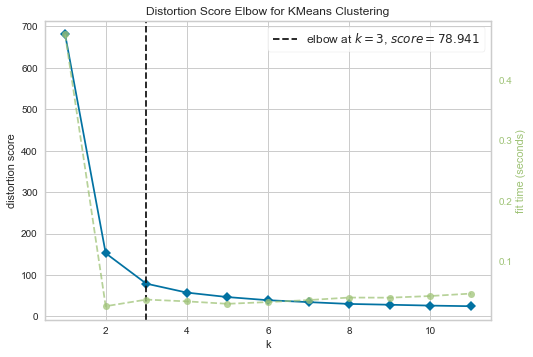

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
visualizer = KElbowVisualizer(kmeans,k=(1,12))
visualizer.fit(X)
visualizer.show()

In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 42)
Y = kmeans.fit_predict(X)

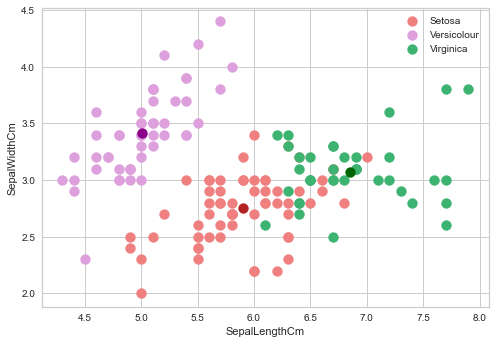

In [23]:
col=['firebrick','darkmagenta','darkgreen']
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s = 100, c = 'lightcoral', label = 'Setosa')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s = 100, c = 'plum', label = 'Versicolour')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s = 100, c = 'mediumseagreen', label = 'Virginica')
# Plotting the centroids of the clusters
for i in range(3):
    plt.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i,1], s = 100, c = col[i])
#plt.title('The elbow method')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm') # Within cluster sum of squares
plt.legend()
plt.show()